In [2]:
import keras
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.keras.backend.set_session(sess)

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [6]:
def preproc_x(x, flatten =True):
    x = x/255
    if flatten:
        x = x.reshape((len(x),-1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Input, Dense
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128],l2_ratio=1e-4):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation='relu'
                      , name='hidden_layer'+str(i+1)
                      , kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = Dense(units=n_units, activation='relu'
                      , name='hidden_layer'+str(i+1)
                      , kernel_regularizer=l2(l2_ratio))(x)
        out = Dense(units=output_units, activation='softmax', name='output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model

In [13]:
LR = 1e-3
epochs=50
batch_size = 256
momentum =0.95
L2_EXP = [1e-2,1e-4,1e-8,1e-12]

In [14]:
result = {}

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print('Experiment with Regulizer = %.6f'%(regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LR, nesterov=True, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-l2-%s'%str(regulizer_ratio)
    result[exp_name_tag]={'train-loss':train_loss,
                          'valid-loss':valid_loss,
                          'train-acc':train_acc,
                          'valid-acc':valid_acc}

W0930 15:11:44.266804 18592 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 15:11:44.269854 18592 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 15:11:44.394511 18592 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


W0930 15:11:44.685720 18592 deprecation.py:323] From C:\Users\User\Anaconda3\envs\DL\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/step - loss: 10.2251 - acc: 0.2990 - val_loss: 9.4745 - val_acc: 0.3540
Epoch 2/50
50000/50000 [==============================] - 9s 176us/step - loss: 8.8727 - acc: 0.3709 - val_loss: 8.3018 - val_acc: 0.3825
Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 7.7939 - acc: 0.3940 - val_loss: 7.3174 - val_acc: 0.3971
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 6.8849 - acc: 0.4075 - val_loss: 6.4793 - val_acc: 0.4039
Epoch 5/50
50000/50000 [==============================] - 9s 174us/step - loss: 6.1094 - acc: 0.4188 - val_loss: 5.7718 - val_acc: 0.4177
Epoch 6/50
50000/50000 [==============================] - 9s 176us/step - loss: 5.4493 - acc: 0.4276 - val_loss: 5.1575 - val_acc: 0.4327
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 4.8868 - acc: 0.4368 - val_loss: 4.6434 

50000/50000 [==============================] - 9s 187us/step - loss: 1.8392 - acc: 0.3929 - val_loss: 1.8190 - val_acc: 0.4023
Epoch 4/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7969 - acc: 0.4087 - val_loss: 1.7827 - val_acc: 0.4132
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7627 - acc: 0.4217 - val_loss: 1.7549 - val_acc: 0.4251
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7333 - acc: 0.4339 - val_loss: 1.7306 - val_acc: 0.4327
Epoch 7/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7073 - acc: 0.4419 - val_loss: 1.7144 - val_acc: 0.4389
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6842 - acc: 0.4502 - val_loss: 1.6879 - val_acc: 0.4444
Epoch 9/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.6642 - acc: 0.4566 - val_loss: 1.6783 - val_acc: 0.4456
Epoch 10/50
50000/50000 [====================

Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6384 - acc: 0.4345 - val_loss: 1.6332 - val_acc: 0.4329
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6114 - acc: 0.4458 - val_loss: 1.6231 - val_acc: 0.4314
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5896 - acc: 0.4523 - val_loss: 1.5962 - val_acc: 0.4473
Epoch 9/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5690 - acc: 0.4593 - val_loss: 1.5809 - val_acc: 0.4498
Epoch 10/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5495 - acc: 0.4679 - val_loss: 1.5592 - val_acc: 0.4591
Epoch 11/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5321 - acc: 0.4736 - val_loss: 1.5500 - val_acc: 0.4592
Epoch 12/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5171 - acc: 0.4761 - val_loss: 1.5422 - val_acc: 0.4609
Epoch 13/50
50000/50000 [====

Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5689 - acc: 0.4609 - val_loss: 1.5768 - val_acc: 0.4527
Epoch 10/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.5500 - acc: 0.4663 - val_loss: 1.5598 - val_acc: 0.4595
Epoch 11/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5330 - acc: 0.4726 - val_loss: 1.5518 - val_acc: 0.4627
Epoch 12/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.5156 - acc: 0.4783 - val_loss: 1.5362 - val_acc: 0.4627
Epoch 13/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5013 - acc: 0.4840 - val_loss: 1.5224 - val_acc: 0.4692
Epoch 14/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.4882 - acc: 0.4881 - val_loss: 1.5178 - val_acc: 0.4684
Epoch 15/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4749 - acc: 0.4909 - val_loss: 1.5047 - val_acc: 0.4739
Epoch 16/50
50000/50000 [===

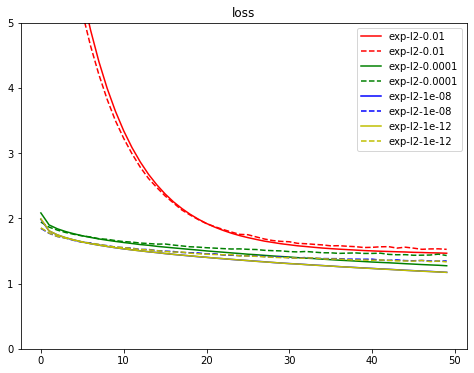

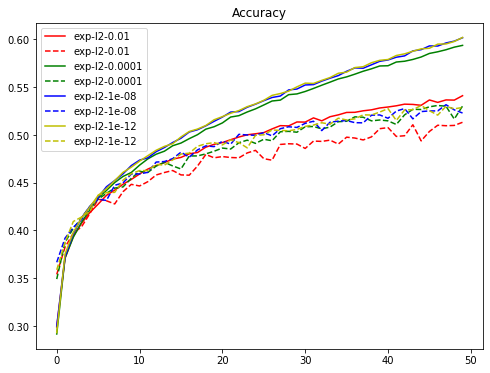

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['r','g','b','y','m','k']
plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    plt.plot(range(len(result[cond]['train-loss'])), result[cond]['train-loss'],'-',c=color_bar[i],label=cond)
    plt.plot(range(len(result[cond]['valid-loss'])), result[cond]['valid-loss'],'--',c=color_bar[i],label=cond)
plt.title('loss')
plt.ylim([0,5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    plt.plot(range(len(result[cond]['train-acc'])), result[cond]['train-acc'],'-',c=color_bar[i],label=cond)
    plt.plot(range(len(result[cond]['valid-acc'])), result[cond]['valid-acc'],'--',c=color_bar[i],label=cond)
plt.title('Accuracy')
plt.legend()
plt.show()

# HW

In [23]:

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512,256,128],l1_ratio=1e-4):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation='relu'
                      , name='hidden_layer'+str(i+1)
                      , kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = Dense(units=n_units, activation='relu'
                      , name='hidden_layer'+str(i+1)
                      , kernel_regularizer=l1(l1_ratio))(x)
        out = Dense(units=output_units, activation='softmax', name='output')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model

In [20]:
LR = 1e-3
epochs=50
batch_size = 256
momentum =0.95
L1_EXP = [1e-2,1e-4,1e-8,1e-12]

In [24]:
result = {}

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print('Experiment with Regulizer = %.6f'%(regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LR, nesterov=True, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-l2-%s'%str(regulizer_ratio)
    result[exp_name_tag]={'train-loss':train_loss,
                          'valid-loss':valid_loss,
                          'train-acc':train_acc,
                          'valid-acc':valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 221us/step - loss: 143.2933 - acc: 0.2809 - val_loss: 9.8360 - val_acc: 0.2574
Epoch 2/50
50000/50000 [==============================] - 10s 192us/step - loss: 3.1653 - acc: 0.1449 - val_loss: 2.4609 - val_acc: 0.1081
Epoch 3/50
50000/50000 [=====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 210us/step - loss: 5.1818 - acc: 0.2975 - val_loss: 5.0238 - val_acc: 0.3489
Epoch 2/50
50000/50000 [==============================] - 12s 242us/step - loss: 4.9462 - acc: 0.3724 - val_loss: 4.8766 - val_acc: 0.3920
Epoch 3/50
50000/50000 [==============================] - 19s 371us/step - loss: 4.8272 - acc: 0.3938 - val_loss: 4.7819 - val_acc: 0.3983
Epoch 4/50
50000/50000 [==============================] - 15s 298us/step - loss: 4.7260 - acc: 0.4107 - val_loss: 4.6894 - val_acc: 0.4083
Epoch 5/50
50000/50000 [==============================] - 14s 272us/step - loss: 4.6343 - acc: 0.4232 - val_loss: 4.5980 - val_acc: 0.4244
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 4.5479 - acc: 0.4329 - val_loss: 4.5147 - val_acc: 0.4310
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 4.4663 - acc: 0.4428 - val_loss: 4.4

50000/50000 [==============================] - 9s 188us/step - loss: 1.7451 - acc: 0.3968 - val_loss: 1.7220 - val_acc: 0.4043
Epoch 4/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7025 - acc: 0.4122 - val_loss: 1.6842 - val_acc: 0.4171
Epoch 5/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.6678 - acc: 0.4225 - val_loss: 1.6558 - val_acc: 0.4256
Epoch 6/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6397 - acc: 0.4340 - val_loss: 1.6288 - val_acc: 0.4322
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6124 - acc: 0.4441 - val_loss: 1.6103 - val_acc: 0.4397
Epoch 8/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5907 - acc: 0.4518 - val_loss: 1.5928 - val_acc: 0.4450
Epoch 9/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5704 - acc: 0.4587 - val_loss: 1.5728 - val_acc: 0.4570
Epoch 10/50
50000/50000 [====================

Epoch 6/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6323 - acc: 0.4372 - val_loss: 1.6290 - val_acc: 0.4346
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6065 - acc: 0.4458 - val_loss: 1.6125 - val_acc: 0.4378
Epoch 8/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5825 - acc: 0.4540 - val_loss: 1.5917 - val_acc: 0.4482
Epoch 9/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5633 - acc: 0.4594 - val_loss: 1.5752 - val_acc: 0.4523
Epoch 10/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.5435 - acc: 0.4672 - val_loss: 1.5597 - val_acc: 0.4489
Epoch 11/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5275 - acc: 0.4744 - val_loss: 1.5470 - val_acc: 0.4641
Epoch 12/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5098 - acc: 0.4801 - val_loss: 1.5348 - val_acc: 0.4611
Epoch 13/50
50000/50000 [===

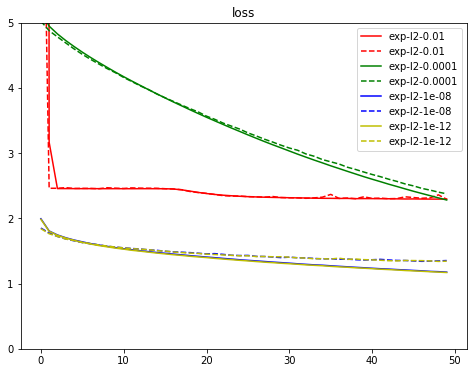

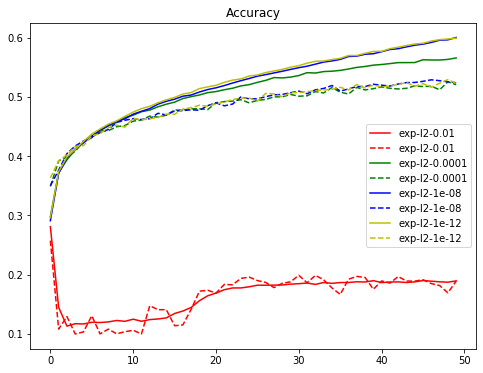

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['r','g','b','y','m','k']
plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    plt.plot(range(len(result[cond]['train-loss'])), result[cond]['train-loss'],'-',c=color_bar[i],label=cond)
    plt.plot(range(len(result[cond]['valid-loss'])), result[cond]['valid-loss'],'--',c=color_bar[i],label=cond)
plt.title('loss')
plt.ylim([0,5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    plt.plot(range(len(result[cond]['train-acc'])), result[cond]['train-acc'],'-',c=color_bar[i],label=cond)
    plt.plot(range(len(result[cond]['valid-acc'])), result[cond]['valid-acc'],'--',c=color_bar[i],label=cond)
plt.title('Accuracy')
plt.legend()
plt.show()